# Pytorch Workflow

In [90]:
what_were_covering = {
    1: "DAta (prepare and load)",
    2: "Build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_were_covering

{1: 'DAta (prepare and load)',
 2: 'Build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [91]:
import torch
from torch import nn # nn contains all of pytorch's building blocks netwoks
import matplotlib.pyplot as plt
import numpy as np

# check pytorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (Preparing and Loading)

Data can ben anything... in machine learing.

*   Excel speadsheat
*   Images of any kind
*   Videos (Youtbube has lots of data...)
*   Audio like songs of podcasts
*   DNA

Machine Learlin is aa game of two parts

1. Get data into a numerical representations
2. Build a model to learning patterns in that numerical representation.

To showcase this, let's create a some *Known* data using the linear regeression formula

We'll use a linear regresssion formula to make a straight line with know parameters

In [92]:
# Create *Known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [93]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets(One of most important concepts in machine learing in general)

Let's create a training and test set with our data

In [94]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?
This is where the data explore's motto comes in!

"Visualise, Visualise, Visualise"

In [95]:
def plot_predictions(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None
                    ):

  """ Plots training data, test data and compares predictions"""

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_label, c='b', s=4, label='Training data')

  # Plot teste data in green
  plt.scatter(test_data, test_label, c='g', s=4, label="Test data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size': 14});

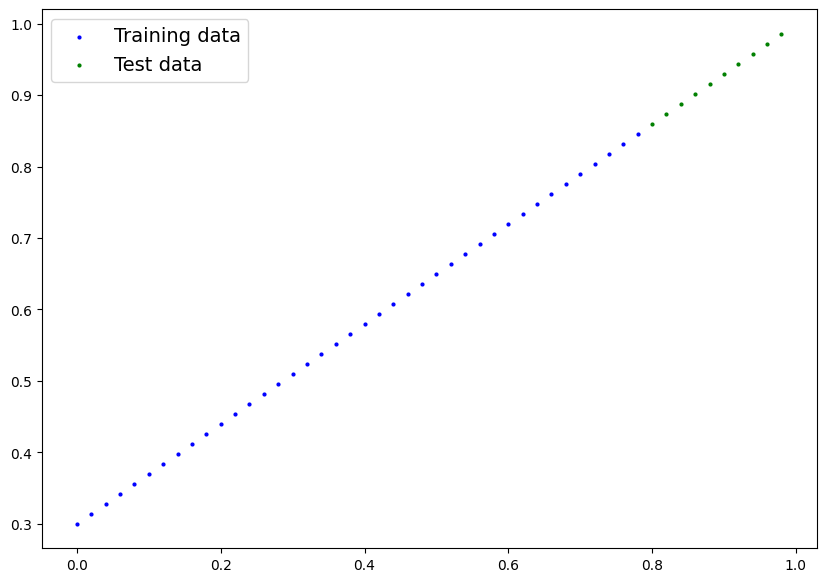

In [96]:
plot_predictions()

## 2. Build Model

Our first model!!
This is very exciting...let's do it!

What out model does:
1. Start with random values
2. Look at training data and adjust the random value to better represent(or ge closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algoritihms:
1. Gradient descent
3. Backpropagation

In [97]:
from torch import nn
# Create a linear regression model class
class LinearRegressionModel(nn.Module) :
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, ## Start with random weights(this will get adjuste as the model learns)
                                            dtype=torch.float),  # Pytorch loves float32 by default
                                            requires_grad=True) # Can we update this value with gradient descent ?

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)


  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # This the linear regression formula

### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs(a neural network can be considered a computatinal graph)
* torch.nn.Parameter - what parameters  should our model try and learn, often a pytorch layer from torch.nn wil set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim - this where the optimizers in pytorch live, they will help with gradient descent

* def forward() - All nn.module subclass require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the content of a Pytorch model

Now  we've created a model, let's what's inside...

So we can check our model parameters or whar's inside our model using .parameters()

In [98]:
# Create a random seed
torch.manual_seed(42)

# Create a instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Paramete(s) within  the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [99]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [100]:
# Check model device
next(model_0.parameters()).device

device(type='cpu')

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y test` based on `x_test`

When we pass data through our model, it's going to run it throug the `forward()` method

More about inference mode: https://twitter.com/PyTorch/status/1437838231505096708?s=20


In [101]:
y_preds = model_0(X_train)
y_preds

tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894],
        [0.1961],
        [0.2029],
        [0.2096],
        [0.2163],
        [0.2231],
        [0.2298],
        [0.2366],
        [0.2433],
        [0.2500],
        [0.2568],
        [0.2635],
        [0.2702],
        [0.2770],
        [0.2837],
        [0.2904],
        [0.2972],
        [0.3039],
        [0.3106],
        [0.3174],
        [0.3241],
        [0.3308],
        [0.3376],
        [0.3443],
        [0.3510],
        [0.3578],
        [0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914]], grad_fn=<AddBackward0>)

In [102]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds, y_test

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

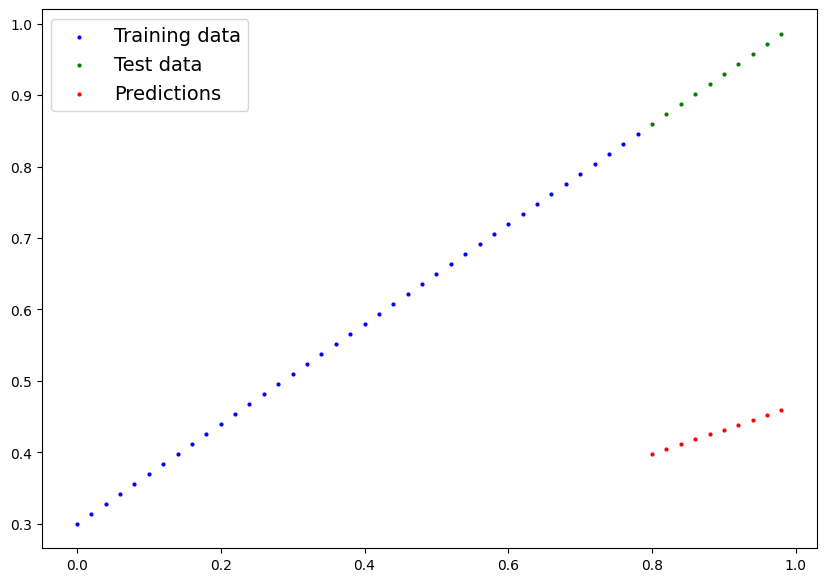

In [103]:
plot_predictions(predictions=y_preds)

from torch.nn.modules.container import ParameterList
## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (this maybe be random)  to nome *known* ParameterList

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your model's predictions are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different area. For our case, we're going to refer to it as loss function

Things we need to train:
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g weight & bias) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [104]:
#Checks out our model's parameters (a parameter is a value that  the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [105]:
# Setup a loss fuction
loss_fn = nn.L1Loss()

# Setup a optimizer(Stocastic Gradient Descent)
optimizer = torch.optim.SGD(
  params=model_0.parameters(),
  lr=0.01 # Learning rate, possible the most important hyperparameter you can set
)


### 3. Build a training loop(and a testing loop in pytorch

A couple  of thins  we need in a training loop;

0. Loop trought the data
1. Forward pass(this involves data move through our model's `forward()` function to make predictionon data - also called  forward propagation or feed forward
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - Move backwards through the network to calculate the gradientes of each parameters of our model with respect  to the loss (**back propagation**)
5. Optimizer step - Use the otimizer to adjusts our model's parameters  to try and improve  the loss (**gradient descent**)

In [106]:
torch.manual_seed(42)

In [107]:
# An epoch is one loop through all the training data(this is a hyperparameter  because we've  set itself)
epochs = 300

# Track diferents values
epochs_count = []
loss_values = []
test_loss_values = []


# 1. loop th rough
for epoch in range(epochs):
  # Set model to training mode
  model_0.train() # Trainmode in pytorch sets all parameters tha require gradients to requires gradient

  # 1. Forward pass on train data using the forward() method inside
  y_pred = model_0(X_train)
  # print(y_pred)

  # 2. Calculate the loss (how different are our models predictions to the ground truth)
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad(gradient) of the optimizer
  optimizer.zero_grad()

  # 4. Loss backwards, performs the brackpropagation on the loss with respect to the parameters of the model
  loss.backward() # Backprogapation on every parameter with requieres_grad=True

  # 5. Progress the optimizer (Perform the gradient descent)
  optimizer.step() # By default how the optimizer changes will accumulate  the loop so..  we have zero them above in step 3 for next iteration of the loop


  ## Put the model in evalution mode
  model_0.eval() #turn off the diferents settings in the model not needed for evaluation/teste (dropout/batch normalization layers)

  # Turn off the gradient tracking &  couple more things behind the scenes
  with torch.inference_mode():
  #with torch.no_grad(): # you may also see torch.no_grad() in older pytorch code

    # 1. Do the foward pass
    test_pred = model_0(X_test)

    # 2. Calculate de loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epochs_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} |  Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 |  Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 |  Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 |  Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 |  Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 |  Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 |  Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 |  Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

In [108]:
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

In [109]:
np.array(torch.tensor(test_loss_values).numpy())

array([0.48106518, 0.3463552 , 0.2172966 , 0.14464018, 0.11360953,
       0.09919948, 0.08886633, 0.08059376, 0.07232123, 0.06473556,
       0.05646304, 0.0481905 , 0.04060482, 0.03233228, 0.02405975,
       0.01647409, 0.00820156, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309,
       0.00502309, 0.00502309, 0.00502309, 0.00502309, 0.00502309],
      dtype=float32)

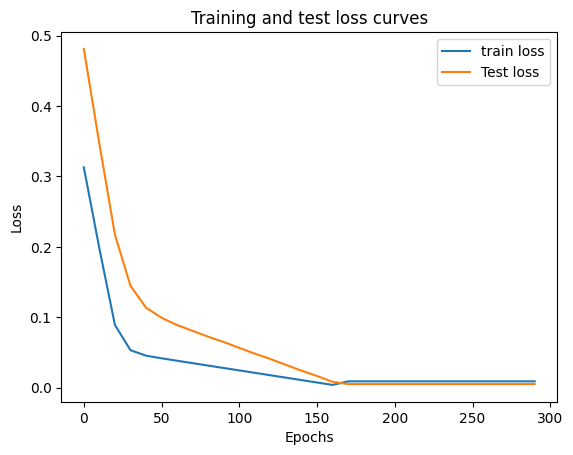

In [110]:
plt.plot(epochs_count,  np.array(torch.tensor(loss_values).numpy()), label='train loss')
plt.plot(epochs_count,  np.array(torch.tensor(test_loss_values).numpy()), label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [111]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [112]:
weight, bias

(0.7, 0.3)

In [113]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

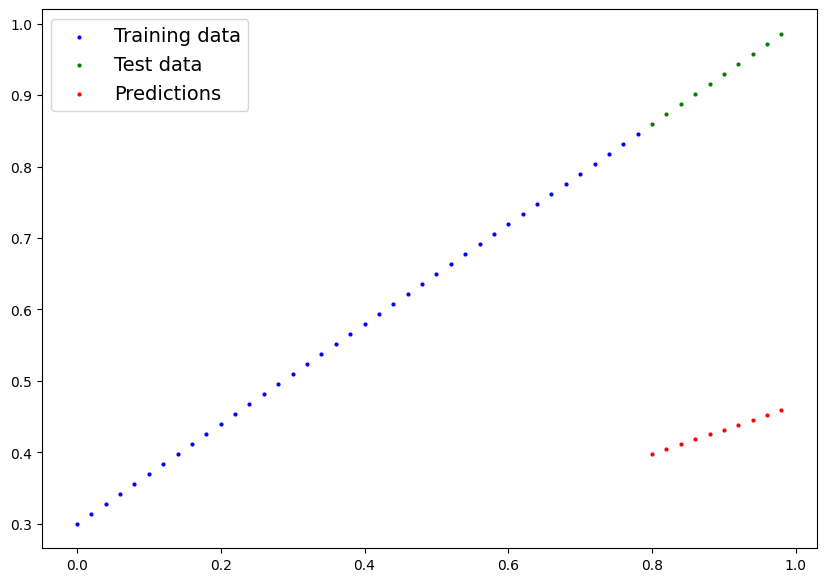

In [114]:
plot_predictions(predictions=y_preds)

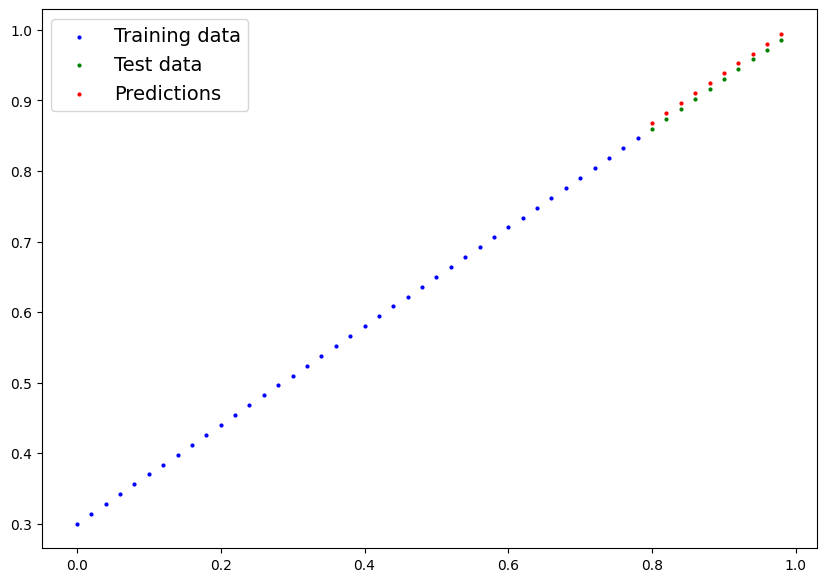

In [115]:
plot_predictions(predictions=y_pred_new)

## Save a model

There are three main methods you shold about for faving and loading model in Pytorch.

1. `torch.save()` - allows you save a Pytorch object in python's pickle format
3. `torch.load()` - sllows you load a saved pytoch object
4. `torch.nn.Module.load_state_dict()` - this allow to load a model's save date dictionary

https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [116]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(
    obj=model_0.state_dict(),  # only saving the state_dict() only saves the models learned parameters, basacaly saves to inference
    f=MODEL_SAVE_PATH
)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [117]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1207 Oct 13 02:09 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1271 Oct 13 02:08 01_pytorch_workflow_model_1.pth


## Loading a Pytorch model

Since we saved our model's state dict rathe the entire mdoel, we'll create  new instance of our model class and load the saved `state_dict()` into that

In [118]:
# Orignal model
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [119]:
# To load in a saved state_dict we have to instatiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()  # (this will be instantiated with random weights)
print(loaded_model_0.state_dict())

# Load the save state_dict of mode_0(this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print("Loaded weigths: ", loaded_model_0.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loaded weigths:  OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [120]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds =  loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [121]:
# Make some predictions with original model
model_0.eval()
with torch.inference_mode():
  preds =  loaded_model_0(X_test)

preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [122]:
# Compare previous model predictions with loaded model predictions (these should be the same)
preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##Put all together with Linear Layer

In [123]:
class LinearRegressionModelV2(nn.Module) :
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters/ also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(
        in_features = 1, # Length of input
        out_features = 1 # Length of output
    )


  # Define the forward computation (input data x flows through nn.Linear())
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



In [124]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

In [125]:
model_1.parameters

<bound method Module.parameters of LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)>

In [126]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [127]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [128]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [129]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(
  params=model_1.parameters(), # optimize newly created model's parameters
  lr=0.01
)

### Train loop


1. Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
2. Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
3. Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
4. Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
5. Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

6. Use the validation set to obtain loss and other model metrics at the end of each epoch

In [130]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing, here we'll often use the valitation set
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [131]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [132]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

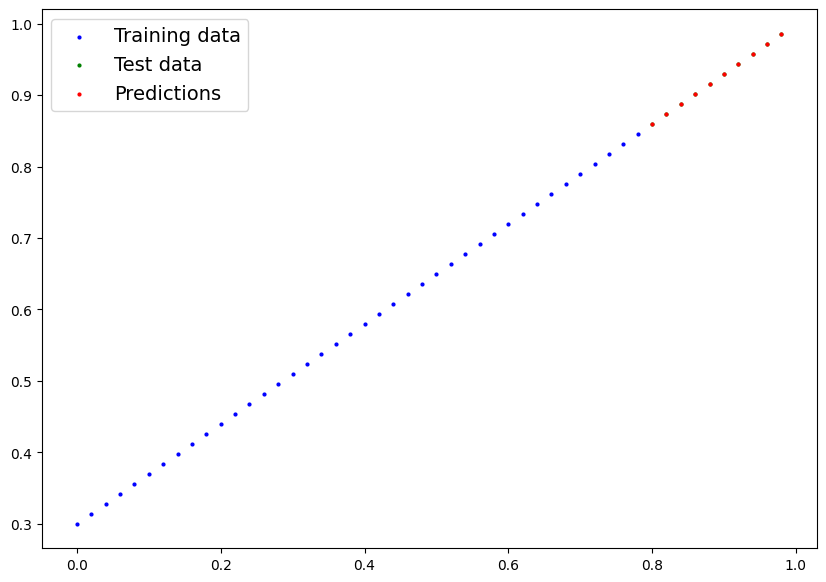

In [133]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu()) # Numpy is cpu based

### Saving and loading a model

In [137]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(
    obj=model_1.state_dict(),  # only saving the state_dict() only saves the models learned parameters, basacaly saves to inference
    f=MODEL_SAVE_PATH
)

Saving model to: models/01_pytorch_workflow_model_1.pth


### Load the saved model

In [138]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

print(MODEL_SAVE_PATH)

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

models/01_pytorch_workflow_model_1.pth
Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [139]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')